In [ ]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
import spacy
import string
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from itertools import islice
def text_lowercase(text):
	return text.lower()

def take(n, iterable):
    """Return the first n items of the iterable as a list."""
    return list(islice(iterable, n))

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
pd.options.mode.chained_assignment = None
def read_csv1():
	return pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Labs_MSc_NLP_CLASS/Project/complaints_processed.csv")
df = read_csv1()
fulldf = read_csv1()
dfHead = df.head()
dfNull = df.isnull().sum()
df = dfHead

In [ ]:
df

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [ ]:
fulldf.shape

(162421, 3)

In [ ]:
df.isnull().sum()

Unnamed: 0    0
product       0
narrative     0
dtype: int64

In [ ]:

for index, row in df.iterrows():
    print(row['product'], row['narrative'])

credit_card purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item remov

#1

In [ ]:
# @title tokenization and stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# remove stopwords function
def remove_stopwords(text):
	stop_words = set(stopwords.words("english"))
	word_tokens = word_tokenize(text)
	filtered_text = [word for word in word_tokens if word not in stop_words]
	return filtered_text


for index, row in df.iterrows():
    #row['narrative'] = remove_stopwords(row['narrative'])
    print(remove_stopwords(row['narrative']))
df = df.drop('Unnamed: 0', axis=1)
df

['purchase', 'order', 'day', 'shipping', 'amount', 'receive', 'product', 'week', 'sent', 'followup', 'email', 'exact', 'verbiage', 'paid', 'two', 'day', 'shipping', 'received', 'order', 'company', 'responded', 'im', 'sorry', 'inform', 'due', 'unusually', 'high', 'order', 'volume', 'order', 'shipped', 'several', 'week', 'stock', 'since', 'early', 'due', 'high', 'demand', 'although', 'continuing', 'take', 'order', 'guaranteeing', 'receive', 'order', 'place', 'due', 'time', 'mask', 'order', 'exact', 'shipping', 'date', 'right', 'however', 'guarantee', 'ship', 'soon', 'soon', 'delivers', 'product', 'u', 'getting', 'small', 'shipment', 'shipping', 'first', 'come', 'first', 'served', 'basis', 'appreciate', 'patience', 'fulfill', 'order', 'quickly', 'recommend', 'keeping', 'order', 'lose', 'place', 'line', 'cancel', 'distributor', 'stock', 'moment', 'prefer', 'cancel', 'please', 'note', 'ask', 'via', 'email', 'cancel', 'accordance', 'cancellation', 'policy', 'agreed', 'checkout', 'electronic'

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [ ]:
# @title Stemming
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()

# stem words in the list of tokenized words
def stem_words(text):
	word_tokens = word_tokenize(text)
	stems = [stemmer.stem(word) for word in word_tokens]
	return stems

def stem_word(word):
	word_tokens = word_tokenize(word)
	stemmed_word = stemmer.stem(word)
	return stemmed_word

for index, row in df.iterrows():
  print(stem_words(row['narrative']))



['purchas', 'order', 'day', 'ship', 'amount', 'receiv', 'product', 'week', 'sent', 'followup', 'email', 'exact', 'verbiag', 'paid', 'two', 'day', 'ship', 'receiv', 'order', 'compani', 'respond', 'im', 'sorri', 'inform', 'due', 'unusu', 'high', 'order', 'volum', 'order', 'ship', 'sever', 'week', 'stock', 'sinc', 'earli', 'due', 'high', 'demand', 'although', 'continu', 'take', 'order', 'guarante', 'receiv', 'order', 'place', 'due', 'time', 'mask', 'order', 'exact', 'ship', 'date', 'right', 'howev', 'guarante', 'ship', 'soon', 'soon', 'deliv', 'product', 'u', 'get', 'small', 'shipment', 'ship', 'first', 'come', 'first', 'serv', 'basi', 'appreci', 'patienc', 'fulfil', 'order', 'quickli', 'recommend', 'keep', 'order', 'lose', 'place', 'line', 'cancel', 'distributor', 'stock', 'moment', 'prefer', 'cancel', 'pleas', 'note', 'ask', 'via', 'email', 'cancel', 'accord', 'cancel', 'polici', 'agre', 'checkout', 'electron', 'inventori', 'onlin', 'request', 'order', 'cancel', 'refund', 'issu', 'cance

In [ ]:
# @title Lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
	word_tokens = word_tokenize(text)
	# provide context i.e. part-of-speech
	lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
	return lemmas
for index, row in df.iterrows():
  print(lemmatize_word(row['narrative']))

['purchase', 'order', 'day', 'ship', 'amount', 'receive', 'product', 'week', 'send', 'followup', 'email', 'exact', 'verbiage', 'pay', 'two', 'day', 'ship', 'receive', 'order', 'company', 'respond', 'im', 'sorry', 'inform', 'due', 'unusually', 'high', 'order', 'volume', 'order', 'ship', 'several', 'week', 'stock', 'since', 'early', 'due', 'high', 'demand', 'although', 'continue', 'take', 'order', 'guarantee', 'receive', 'order', 'place', 'due', 'time', 'mask', 'order', 'exact', 'ship', 'date', 'right', 'however', 'guarantee', 'ship', 'soon', 'soon', 'deliver', 'product', 'u', 'get', 'small', 'shipment', 'ship', 'first', 'come', 'first', 'serve', 'basis', 'appreciate', 'patience', 'fulfill', 'order', 'quickly', 'recommend', 'keep', 'order', 'lose', 'place', 'line', 'cancel', 'distributor', 'stock', 'moment', 'prefer', 'cancel', 'please', 'note', 'ask', 'via', 'email', 'cancel', 'accordance', 'cancellation', 'policy', 'agree', 'checkout', 'electronic', 'inventory', 'online', 'request', 'o

In [ ]:
# @title spelling fixes
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(str(spell.correction(word)))
        else:
            corrected_text.append(str(word))
    return " ".join(corrected_text)

#text = "speling correctin"
for index, row in df.iterrows():
  print(correct_spellings(row['narrative']))

purchase order day shipping amount receive product week sent follow email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded None shipping tax total us visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing called back dis

In [ ]:
# @title SPACY NER Named Entity Recognition
from spacy import displacy

spacy.cli.download("en_core_web_sm")
#Command line interface download

NER = spacy.load("en_core_web_sm")

def spacy_large_ner(document):
  return [(ent.text.strip(), ent.label_) for ent in NER(document).ents]


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# @title SPACY NER Named Entity Recognition 2
#spaCy has the property ents on Doc objects. We will use it to extract named entities
for index, row in df.iterrows():
  print(row['narrative'])
  data = spacy_large_ner(row['narrative'])
  print(data)

purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing called b

In [ ]:
#df['narrative'].to_list()
df

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [ ]:
# @title Bag of Words
import nltk
from nltk.tokenize  import word_tokenize
from nltk.corpus    import stopwords
from collections    import Counter

# narrative column as array
documents = fulldf['narrative'].to_list()

# Tokenization and lowercasing
tokens = [word_tokenize(doc.lower()) for doc in documents]

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
filtered_tokens = [[word for word in token if word.isalnum() and word not in stop_words] for token in tokens]

# Create a vocabulary
vocabulary = set(word for token in filtered_tokens for word in token)

# Initialize a BoW dictionary with word counts
bow = {word: 0 for word in vocabulary}

# Count word occurrences
for token in filtered_tokens:
    for word in token:
        bow[word] += 1

orderedBow = dict(sorted(bow.items(), key=lambda item: item[1],reverse=True))

print(orderedBow)
# Print the BoW representation
print("Bag of Words (BoW) representation:")
print(bow)

{'prceeded': 1, 'expierians': 1, 'beenapproved': 1, 'foreseeing': 1, 'emphathy': 1, 'chided': 1, 'qhere': 1, 'riskto': 1, 'settimg': 1, 'morage': 1, 'crapcake': 1, 'reenable': 1, 'unmatured': 1, 'agencyshall': 1, 'scratchy': 1, 'prequailified': 1, 'uah': 1, 'dominican': 1, 'modded': 1, 'feal': 1, 'viewpoint': 1, 'accustaions': 1, 'formative': 1, 'incalled': 1, 'reassurd': 1, 'eletric': 1, 'hedid': 1, 'okla': 1, 'uselessit': 1, 'propping': 1, 'incidient': 1, 'muttle': 1, 'neverfinish': 1, 'wuedtion': 1, 'gin': 1, 'unmercilessly': 1, 'ogf': 1, 'chargses': 1, 'activr': 1, 'revese': 1, 'villalba': 1, 'owethem': 1, 'correcing': 1, 'nonsensicality': 1, 'cpfbto': 1, 'misjudgment': 1, 'rigidness': 1, 'iop': 1, 'barbecue': 1, 'updared': 1, 'paylaince': 1, 'specialised': 1, 'mercant': 1, 'everyhing': 1, 'timeafter': 1, 'ackwnoledge': 1, 'utoward': 1, 'vacuous': 1, 'fromed': 1, 'ulteriior': 1, 'personnerl': 1, 'tus': 1, 'rtgage': 1, 'liabliltiy': 1, 'dhsh': 1, 'anaccount': 1, 'credfurther': 1, 'p

In [ ]:
# @title 5 most used words from bag of words
orderedBow = dict(sorted(bow.items(), key=lambda item: item[1],reverse=True))
labelsOrderedBow = take(5, orderedBow.keys())
occurancesOrderedBow = take(5, orderedBow.values())
print(labelsOrderedBow)
print(occurancesOrderedBow)

['credit', 'account', 'report', 'information', 'payment']
[317561, 316151, 177193, 143538, 127704]


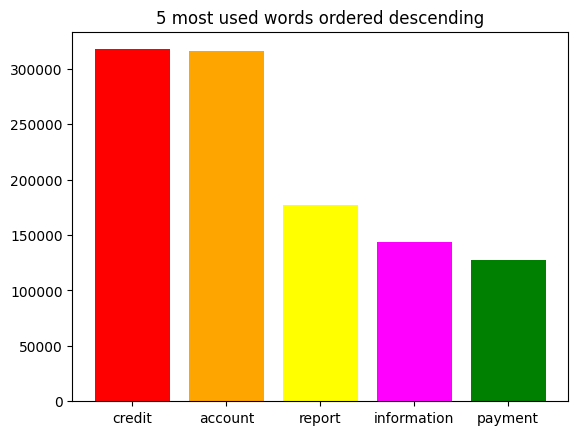

In [ ]:
plt.bar(x=labelsOrderedBow, height=occurancesOrderedBow, color=["red","orange","yellow","magenta","green"], align='center')
plt.title("5 most used words ordered descending")
plt.show()

In [ ]:
plt.bar()

In [ ]:
# @title group by products
#df.groupby(['product']).size().reset_index(name='counts')
fulldf.groupby(['product']).size().reset_index(name='counts')

,product,counts
0,credit_card,15566
1,credit_reporting,91179
2,debt_collection,23150
3,mortgages_and_loans,18990
4,retail_banking,13536


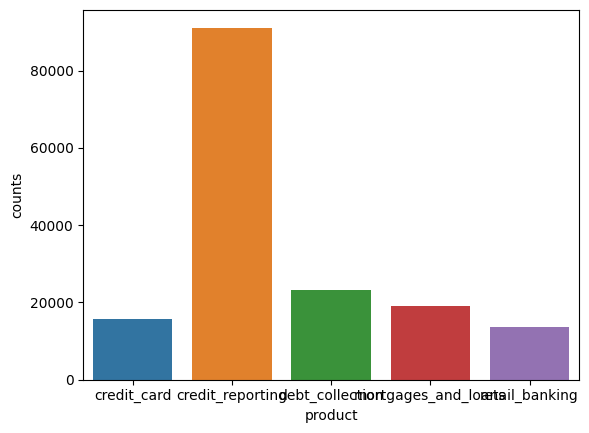

In [ ]:
ax = sns.barplot(x="product",y="counts", data=fulldf.groupby(['product']).size().reset_index(name='counts'))

In [ ]:
df.groupby(['product']).size()

product
credit_card         2
credit_reporting    2
retail_banking      1
dtype: int64

#2

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df['product'].value_counts()

credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: product, dtype: int64

In [ ]:
def text_clean(text):
    clean_words = []

    word_list = text.split()
    for word in word_list:
        word_l = word.lower().strip()
        if word_l.isalpha():
            if len(word_l) > 3:
                if word_l not in nltk.corpus.stopwords.words('english'):
                    clean_words.append(word_l)
                else:
                    continue
    return clean_words

In [ ]:
# be careful it takes long to run using normal cpu power
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(analyzer=text_clean)
X=tfidf.fit_transform(df['narrative'][:5000])

In [ ]:
X_test

<3196x8745 sparse matrix of type '<class 'numpy.float64'>'
	with 340152 stored elements in Compressed Sparse Row format>

In [ ]:
from imblearn.over_sampling import SMOTE
x_smote, y_smote = SMOTE().fit_resample(X, df['product'][:5000])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.20,random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
nb.predict(X_test)

array(['mortgages_and_loans', 'mortgages_and_loans', 'debt_collection',
       ..., 'debt_collection', 'debt_collection', 'mortgages_and_loans'],
      dtype='<U19')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nb.predict(X_test)))

                     precision    recall  f1-score   support

        credit_card       0.92      0.98      0.95       638
   credit_reporting       0.96      0.74      0.84       623
    debt_collection       0.87      0.93      0.90       699
mortgages_and_loans       0.91      0.98      0.94       609
     retail_banking       0.97      0.98      0.98       627

           accuracy                           0.92      3196
          macro avg       0.93      0.92      0.92      3196
       weighted avg       0.92      0.92      0.92      3196



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf.predict(X_test)

array(['mortgages_and_loans', 'mortgages_and_loans', 'debt_collection',
       ..., 'debt_collection', 'debt_collection', 'mortgages_and_loans'],
      dtype=object)

In [ ]:
print(classification_report(y_test,rf.predict(X_test)))

                     precision    recall  f1-score   support

        credit_card       0.99      1.00      0.99       638
   credit_reporting       0.95      0.93      0.94       623
    debt_collection       0.95      0.97      0.96       699
mortgages_and_loans       0.99      0.99      0.99       609
     retail_banking       1.00      0.99      0.99       627

           accuracy                           0.98      3196
          macro avg       0.98      0.98      0.98      3196
       weighted avg       0.98      0.98      0.98      3196

